In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
# To - Do - 1:
#1
data = pd.read_csv('/content/drive/MyDrive/Concept_and_Technology_of_Ai/Week5/student.csv')

In [16]:
#2
print("First 5 rows:")
print(data.head())
print("\nLast 5 rows:")
print(data.tail())

First 5 rows:
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

Last 5 rows:
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72


In [6]:
#3
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None


In [7]:
#4
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000    79.000000
max     100.000000   100.000000   100.000000


In [8]:
#5
X = data[['Math', 'Reading']].values
Y = data['Writing'].values

In [20]:
# To - Do - 2:
# Transposing X to match the required format (d×n)
X = X.T  # Now shape is (2×n)
Y = Y.reshape(-1, 1)  # Shape (n×1)
W = np.zeros((2, 1))  # Shape (d×1) for 2 features

print("\nMatrix Shapes:")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"W shape: {W.shape}")


Matrix Shapes:
X shape: (1000, 2)
Y shape: (1000, 1)
W shape: (2, 1)


In [22]:
# To-Do 3: Train-Test Split
# Transpose X back to the original shape (n, d)
X = X.T  # Now shape is (1000, 2)

# Perform 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\nTrain-Test Shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


Train-Test Shapes:
X_train shape: (800, 2)
X_test shape: (200, 2)
Y_train shape: (800, 1)
Y_test shape: (200, 1)


Test Cost: 0.0
Optimal Weights: [0.34811659 0.64614558]
Cost for the first 10 iterations: [2013.165570783755, 1640.286832599692, 1337.0619994901588, 1090.4794892850578, 889.9583270083234, 726.8940993009545, 594.2897260808594, 486.4552052951635, 398.7634463599484, 327.4517147324688]
RMSE: 5.2798239764188635
R-squared: 0.8886354462786421


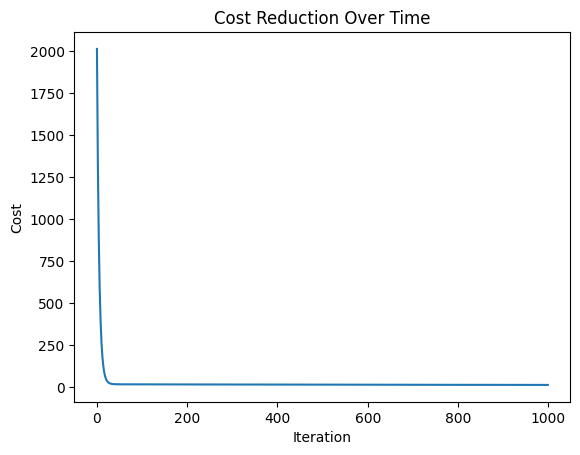

In [11]:
def cost_function(X, Y, W):
    """Calculate the Mean Squared Error (MSE)"""
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

def gradient_descent(X, Y, W, alpha, iterations):
    """Optimize weights using gradient descent"""
    m = len(Y)
    cost_history = [0] * iterations

    for iteration in range(iterations):
        Y_pred = np.dot(X, W)  # Predicted values
        loss = Y_pred - Y  # Difference between predicted and actual values
        dw = (1 / m) * np.dot(X.T, loss)  # Compute gradients
        W -= alpha * dw  # Update weights
        cost = cost_function(X, Y, W)  # Compute cost after weight update
        cost_history[iteration] = cost

    return W, cost_history

def rmse(Y, Y_pred):
    """Calculate Root Mean Squared Error (RMSE)"""
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

def r2(Y, Y_pred):
    """Calculate R-squared, a measure of how well predictions match actual values"""
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)  # Total sum of squares
    ss_res = np.sum((Y - Y_pred) ** 2)  # Residual sum of squares
    return 1 - (ss_res / ss_tot)

def main():
    # Load and prepare data
    X = data[['Math', 'Reading']].values
    Y = data['Writing'].values

    # Split data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    Y_train = Y_train.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)

    # Initialize weights and training parameters
    W = np.zeros((X_train.shape[1], 1))
    alpha = 0.00001  # Learning rate
    iterations = 1000  # Number of iterations

    # Train the model using gradient descent
    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    # Make predictions on test data
    Y_pred = np.dot(X_test, W_optimal)

    # Evaluate the model
    model_rmse = rmse(Y_test, Y_pred)
    model_r2 = r2(Y_test, Y_pred)

    # Print results
    print("Optimal Weights:", W_optimal.flatten())
    print("Cost for the first 10 iterations:", cost_history[:10])
    print("RMSE:", model_rmse)
    print("R-squared:", model_r2)

    # Plot cost over iterations
    plt.plot(cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Reduction Over Time')
    plt.show()

if __name__ == "__main__":
    # Verify cost function with a simple example
    X_test = np.array([[1, 2], [3, 4], [5, 6]])
    Y_test = np.array([3, 7, 11]).reshape(-1, 1)
    W_test = np.array([1, 1]).reshape(-1, 1)
    test_cost = cost_function(X_test, Y_test, W_test)
    print("Test Cost:", test_cost)

    # Run the main function to train and evaluate the model
    main()
